> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

> I chose Medical Appointment No Shows dataset, which shows data of 110,527 patients inlcuding whether they showed up for their appointments or no, the dataset is designed to indicate which factors might affect showing up for medical appointments.

> 01 - PatientId: Identification of a patient  (Insignificant)
 
> 02 - AppointmentID: Identification of each appointment (Insignificant)

> 03 - Gender
Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.

> 04 - Appointment_Day
The day of the actuall appointment, when they have to visit the doctor.

> 05 - Scheduled_Day
The day someone called or registered the appointment, this is before appointment of course.

> 06 - Age: How old is the patient.

> 07 - Neighbourhood: Where the appointment takes place. (Insignificant)

> 08 - Scholarship: True of False. A scholarship that was provided by Brazilian Government. (Insignificant)

> 09 - Hipertension: True or False

> 10 - Diabetes: True or False

> 11 - Alcoholism: True or False

> 12 - Handicap: True or False

> 13 - SMS_received: 1 or more messages sent to the patient.


### Question(s) for Analysis
> Exploring Effect of chosen variables on the Variable (No_show) that shows whether a person showed up for medical appointment or no

> 1. Does Gender Affect Showing up For Appointments

> 2. Does Age Affect Showing up For Appointments

> 3. Does Hipertension Affect Showing up For Appointments

> 4. Does Being Diabetic Affect Showing up For Appointments

> 5. Does Difference in Days Affect Showing up For Appointments
    <i> (Diffence Between Appointment Day And Scheduled Day) </i>

> 6. Does Alcolholism Affect Showing up For Appointments

> 7. Does Receiving an SMS Affect Showing up For Appointments

> 8. Does Having a Handicap Affect Showing Up For Appointments

In [371]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
% matplotlib inline



In [372]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

In [373]:
<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

SyntaxError: invalid syntax (<ipython-input-373-f2c56bac56be>, line 1)

In [374]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No



### Data Cleaning
> First: We will drop some columns, (PatientId, AppointmentID, Neighbourhood, Scholarship)

> Second: Rename some columns for eaiser access

> Third: Change strings that represent datetime to datetime data types

> Fourth: Create a new column, 'Days_Difference', to hold difference between Appointment day and Scheduled Day. We will be using that new column in our analysis.

 

In [375]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId','AppointmentID','Neighbourhood' ,'Scholarship'],axis=1,inplace=True)
df.rename(columns = {'ScheduledDay':'Scheduled_Day', 'AppointmentDay':'Appointment_Day', 'No-show':'No_show', 'Handcap':'Handicap'}, inplace = True)
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])
df['Days_Difference'] = abs((df['Appointment_Day'] - df['Scheduled_Day'])).dt.days
df.dtypes
sum(df.duplicated())

765

> Here, we dropped duplicates

In [376]:

df.drop_duplicates()
df.tail()

,Gender,Scheduled_Day,Appointment_Day,Age,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Days_Difference
110522,F,2016-05-03 09:15:35,2016-06-07,56,0,0,0,0,1,No,34
110523,F,2016-05-03 07:27:33,2016-06-07,51,0,0,0,0,1,No,34
110524,F,2016-04-27 16:03:52,2016-06-07,21,0,0,0,0,1,No,40
110525,F,2016-04-27 15:09:23,2016-06-07,38,0,0,0,0,1,No,40
110526,F,2016-04-27 13:30:56,2016-06-07,54,0,0,0,0,1,No,40


> Here, dropped Ages that are less than zero, they are errors in the dataset

In [377]:
df.drop(df[df['Age']<0].index, inplace = True)

> Here, we removed outliers from 'Days_Difference', and 'Age' columns.

In [378]:
df['Days_Difference'] = df['Days_Difference'][~((df['Days_Difference']-df['Days_Difference'].mean()).abs() > 3*df['Days_Difference'].std())]
df['Age'] = df['Age'][~((df['Age']-df['Age'].mean()).abs() > 3*df['Age'].std())]

In [379]:
print(df.isna().sum())

Gender                0
Scheduled_Day         0
Appointment_Day       0
Age                   5
Hipertension          0
Diabetes              0
Alcoholism            0
Handicap              0
SMS_received          0
No_show               0
Days_Difference    2669
dtype: int64


> Here, we dropped nulls that arose from removing outliers

In [380]:
df.dropna(inplace = True)

In [381]:
df['No_show'].value_counts()

No     86320
Yes    21532
Name: No_show, dtype: int64

In [382]:
df['Alcoholism'].value_counts()

0    104516
1      3336
Name: Alcoholism, dtype: int64

In [383]:
df['Diabetes'].value_counts()

0    100108
1      7744
Name: Diabetes, dtype: int64

In [384]:
df['Handicap'].nunique()

5

> Here we edited the values of Handicap to be 0s and 1s only

In [385]:
df['Handicap'][df['Handicap'] == 2]=1
df['Handicap'][df['Handicap'] == 3]=1
df['Handicap'][df['Handicap'] == 4]=1
df.Handicap.value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    105666
1      2186
Name: Handicap, dtype: int64

> Here, we changed No_show columns to 0s and 1s, and made it numeric

In [386]:
df['No_show'][df['No_show']=='No'] ='0'
df['No_show'][df['No_show']=='Yes'] ='1'
df['No_show'] = pd.to_numeric(df['No_show'])


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [389]:

df['No_show'].value_counts()

0    86320
1    21532
Name: No_show, dtype: int64

In [390]:
df['SMS_received'].value_counts()

0    74083
1    33769
Name: SMS_received, dtype: int64

In [391]:
print(df.isna().sum())

Gender             0
Scheduled_Day      0
Appointment_Day    0
Age                0
Hipertension       0
Diabetes           0
Alcoholism         0
Handicap           0
SMS_received       0
No_show            0
Days_Difference    0
dtype: int64


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107852 entries, 0 to 110526
Data columns (total 11 columns):
Gender             107852 non-null object
Scheduled_Day      107852 non-null datetime64[ns]
Appointment_Day    107852 non-null datetime64[ns]
Age                107852 non-null float64
Hipertension       107852 non-null int64
Diabetes           107852 non-null int64
Alcoholism         107852 non-null int64
Handicap           107852 non-null int64
SMS_received       107852 non-null int64
No_show            107852 non-null int64
Days_Difference    107852 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(6), object(1)
memory usage: 9.9+ MB


In [393]:
df['No_show'].value_counts()

0    86320
1    21532
Name: No_show, dtype: int64

In [394]:
df_show = df[df['No_show']==0]
df_no = df[df['No_show']==1]
df_show.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86320 entries, 0 to 110526
Data columns (total 11 columns):
Gender             86320 non-null object
Scheduled_Day      86320 non-null datetime64[ns]
Appointment_Day    86320 non-null datetime64[ns]
Age                86320 non-null float64
Hipertension       86320 non-null int64
Diabetes           86320 non-null int64
Alcoholism         86320 non-null int64
Handicap           86320 non-null int64
SMS_received       86320 non-null int64
No_show            86320 non-null int64
Days_Difference    86320 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(6), object(1)
memory usage: 7.9+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### 1. Does Gender Affect Showing up For Appointments

In [395]:
Male_Show = df_show['Gender'].value_counts()[1]/np.count_nonzero(df['Gender']=='M')*100
Female_Show = df_show['Gender'].value_counts()[0]/np.count_nonzero(df['Gender']=='F')*100
print(Male_Show, Female_Show)
print(df_show['Gender'].value_counts())

80.255164034 79.9168500157
F    55937
M    30383
Name: Gender, dtype: int64


In [396]:
Male_No_Show = df_no['Gender'].value_counts()[1]/np.count_nonzero(df['Gender']=='M')*100
Female_No_Show = df_no['Gender'].value_counts()[0]/np.count_nonzero(df['Gender']=='F')*100
print(Male_No_Show, Female_No_Show)


19.744835966 20.0831499843


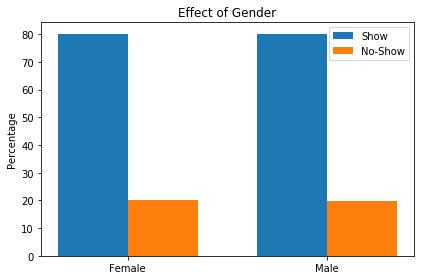

In [397]:
labels = ["Female","Male"]
x = np.arange(len(labels))

Gender_show = [Female_Show, Male_Show]
Gender_no =[Female_No_Show, Male_No_Show]
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Gender_show, width, label='Show')
rects2 = ax.bar(x + width/2, Gender_no, width, label='No-Show')

ax.set_ylabel('Percentage')
ax.set_title('Effect of Gender')
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.legend()
plt.xticks = labels
fig.tight_layout()

### No Significant Results Based on Gender


### 2. Does Age Affect Showing up For Appointments

In [398]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_show['Age'].describe()

count    86320.000000
mean        37.515443
std         23.270751
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        102.000000
Name: Age, dtype: float64

In [399]:
df_no['Age'].describe()

count    21532.000000
mean        34.022710
std         21.775675
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max         98.000000
Name: Age, dtype: float64

In [400]:
df['Age'].describe()

count    107852.000000
mean         36.818140
std          23.022315
min           0.000000
25%          17.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

In [401]:
df['Age_Intervals'] = pd.cut(df['Age'], bins = [0,17,37,55,102], labels = ['x <= 17', '17 < x <= 37', '37 < x <= 55', '55 < x <= 102']);

In [402]:
df_show = df[df['No_show']== 0]
df_no = df[df['No_show']== 1]


In [403]:
Less_17_Show = df_show['Age_Intervals'].value_counts()[0]/np.count_nonzero(df['Age_Intervals']=='x <= 17')*100
Less_37_Show = df_show['Age_Intervals'].value_counts()[1]/np.count_nonzero(df['Age_Intervals']=='17 < x <= 37')*100
Less_55_Show = df_show['Age_Intervals'].value_counts()[2]/np.count_nonzero(df['Age_Intervals']=='37 < x <= 55')*100
Less_102_Show = df_show['Age_Intervals'].value_counts()[3]/np.count_nonzero(df['Age_Intervals']=='55 < x <= 102')*100

print(Less_17_Show, Less_37_Show, Less_55_Show, Less_102_Show)
print(df_show['Age_Intervals'].value_counts()[3])

77.8004246285 76.7370319296 80.6157832565 84.6960486322
22292


In [404]:
Less_17_No_Show = df_no['Age_Intervals'].value_counts()[0]/np.count_nonzero(df['Age_Intervals']=='x <= 17')*100
Less_37_No_Show = df_no['Age_Intervals'].value_counts()[1]/np.count_nonzero(df['Age_Intervals']=='17 < x <= 37')*100
Less_55_No_Show = df_no['Age_Intervals'].value_counts()[2]/np.count_nonzero(df['Age_Intervals']=='37 < x <= 55')*100
Less_102_No_Show = df_no['Age_Intervals'].value_counts()[3]/np.count_nonzero(df['Age_Intervals']=='55 < x <= 102')*100

print(Less_17_No_Show, Less_37_No_Show, Less_55_No_Show, Less_102_No_Show)
print(df_no['Age_Intervals'].value_counts()[2])
print(np.count_nonzero(df['Age_Intervals']=='x <= 18'))

22.1995753715 23.2629680704 19.3842167435 15.3039513678
5087
0


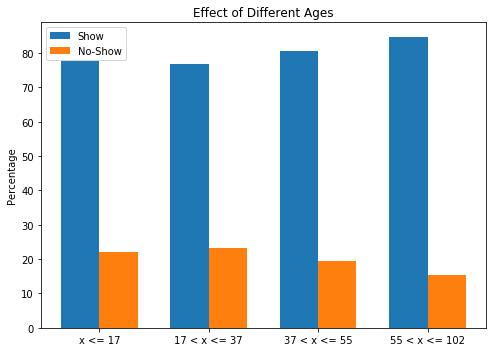

In [405]:
labels = ['x <= 17', '17 < x <= 37', '37 < x <= 55', '55 < x <= 102']
x = np.arange(len(labels))

Age_show = [Less_17_Show, Less_37_Show, Less_55_Show, Less_102_Show]
Age_no =[Less_17_No_Show, Less_37_No_Show, Less_55_No_Show, Less_102_No_Show]
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Age_show, width, label='Show')
rects2 = ax.bar(x + width/2, Age_no, width, label='No-Show')

ax.set_ylabel('Percentage')
ax.set_title('Effect of Different Ages')
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.legend()
plt.xticks = labels
figure = plt.gcf()
figure.set_size_inches(7,5)
fig.tight_layout()

### No Singificant Results based on Age

### 3. Does Hipertension Affect Showing up For Appointments

In [406]:
Hipertension_Show = df_show['Hipertension'].value_counts()[1]/np.count_nonzero(df['Hipertension']==1)*100
No_Hipertension_Show = df_show['Hipertension'].value_counts()[0]/np.count_nonzero(df['Hipertension']==0)*100
print(Hipertension_Show, No_Hipertension_Show)
print(df_show['Hipertension'].value_counts()[1])

83.068508652 79.2931916023
17618


In [407]:
Hipertension_No_Show = df_no['Hipertension'].value_counts()[1]/np.count_nonzero(df['Hipertension']==1)*100
No_Hipertension_No_Show = df_no['Hipertension'].value_counts()[0]/np.count_nonzero(df['Hipertension']==0)*100
print(Hipertension_No_Show, No_Hipertension_No_Show)


16.931491348 20.7068083977


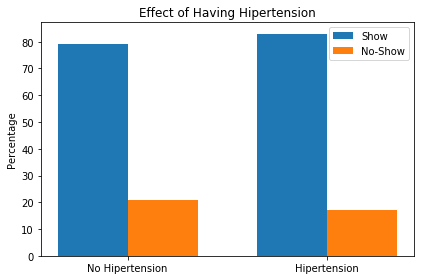

In [408]:
labels = ["No Hipertension","Hipertension"]
x = np.arange(len(labels))

Hipertension_show = [No_Hipertension_Show, Hipertension_Show]
Hipertension_no =[No_Hipertension_No_Show, Hipertension_No_Show]
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Hipertension_show, width, label='Show')
rects2 = ax.bar(x + width/2, Hipertension_no, width, label='No-Show')

ax.set_ylabel('Percentage')
ax.set_title('Effect of Having Hipertension')
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.legend()
plt.xticks = labels
fig.tight_layout()

### 4. Does Being Diabetic Affect Showing up For Appointments

In [409]:
Diabetes_Show = df_show['Diabetes'].value_counts()[1]/np.count_nonzero(df['Diabetes']==1)*100
No_Diabetes_Show = df_show['Diabetes'].value_counts()[0]/np.count_nonzero(df['Diabetes']==0)*100
print(Diabetes_Show, No_Diabetes_Show)
print(df_show['Diabetes'].value_counts()[1])

82.2830578512 79.8617493107
6372


In [410]:
Diabetes_No_Show = df_no['Diabetes'].value_counts()[1]/np.count_nonzero(df['Diabetes']==1)*100
No_Diabetes_No_Show = df_no['Diabetes'].value_counts()[0]/np.count_nonzero(df['Diabetes']==0)*100
print(Diabetes_No_Show, No_Diabetes_No_Show)


17.7169421488 20.1382506893


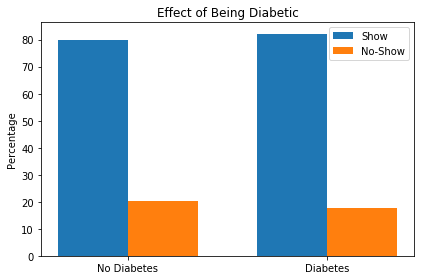

In [411]:
labels = ["No Diabetes","Diabetes"]
x = np.arange(len(labels))

Diabetes_show = [No_Diabetes_Show, Diabetes_Show]
Diabetes_no =[No_Diabetes_No_Show, Diabetes_No_Show]
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Diabetes_show, width, label='Show')
rects2 = ax.bar(x + width/2, Diabetes_no, width, label='No-Show')

ax.set_ylabel('Percentage')
ax.set_title('Effect of Being Diabetic')
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.legend()
plt.xticks = labels
fig.tight_layout()

### 5. Does Difference in Days Affect Showing up For Appointments
<p><i>Diffence Between Appointment Day And Scheduled Day </i></p>

In [412]:
df['Days_Difference'].describe()

count    107852.000000
mean          8.026963
std          11.328743
min           0.000000
25%           0.000000
50%           3.000000
75%          13.000000
max          54.000000
Name: Days_Difference, dtype: float64

In [413]:
df['Days_Difference_Intervals'] = pd.cut(df['Days_Difference'], bins = [-1,0,3,13,54], labels = ['x = 0', '1 <= x <= 3', '3 < x <= 13', '13 < x <= 54']);

AxesSubplot(0.125,0.125;0.775x0.755)


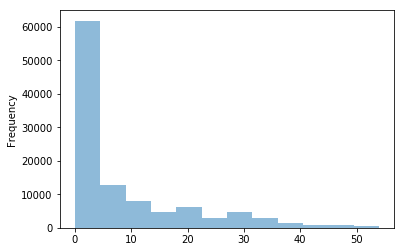

In [414]:
print(df['Days_Difference'].plot.hist(bins=12, alpha=0.5))

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107852 entries, 0 to 110526
Data columns (total 13 columns):
Gender                       107852 non-null object
Scheduled_Day                107852 non-null datetime64[ns]
Appointment_Day              107852 non-null datetime64[ns]
Age                          107852 non-null float64
Hipertension                 107852 non-null int64
Diabetes                     107852 non-null int64
Alcoholism                   107852 non-null int64
Handicap                     107852 non-null int64
SMS_received                 107852 non-null int64
No_show                      107852 non-null int64
Days_Difference              107852 non-null float64
Age_Intervals                104394 non-null category
Days_Difference_Intervals    107852 non-null category
dtypes: category(2), datetime64[ns](2), float64(2), int64(6), object(1)
memory usage: 10.1+ MB


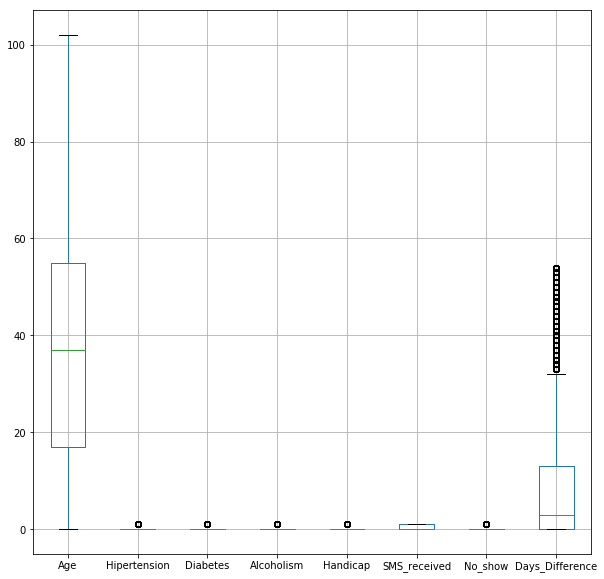

In [416]:
df.boxplot(figsize = (10,10))

In [417]:
df_show = df[df['No_show']==0]
df_no = df[df['No_show']==1]
print(df['Days_Difference'].describe())
sum(df_show['Days_Difference_Intervals'].value_counts())

count    107852.000000
mean          8.026963
std          11.328743
min           0.000000
25%           0.000000
50%           3.000000
75%          13.000000
max          54.000000
Name: Days_Difference, dtype: float64


86320

In [418]:
Equal_0_Show = df_show['Days_Difference_Intervals'].value_counts()[0]/np.count_nonzero(df['Days_Difference_Intervals']=='x = 0')*100
Less_3_Show = df_show['Days_Difference_Intervals'].value_counts()[1]/np.count_nonzero(df['Days_Difference_Intervals']=='1 <= x <= 3')*100
Less_13_Show = df_show['Days_Difference_Intervals'].value_counts()[2]/np.count_nonzero(df['Days_Difference_Intervals']=='3 < x <= 13')*100
Less_54_Show = df_show['Days_Difference_Intervals'].value_counts()[3]/np.count_nonzero(df['Days_Difference_Intervals']=='13 < x <= 54')*100

print(Equal_0_Show, Less_3_Show, Less_13_Show, Less_54_Show)
print(df_show['Days_Difference_Intervals'].value_counts()[2])

93.3636405172 76.4199539108 71.7602903572 66.8992742643
17399


In [419]:
Equal_0_No_Show = df_no['Days_Difference_Intervals'].value_counts()[0]/np.count_nonzero(df['Days_Difference_Intervals']=='x = 0')*100
Less_3_No_Show = df_no['Days_Difference_Intervals'].value_counts()[1]/np.count_nonzero(df['Days_Difference_Intervals']=='1 <= x <= 3')*100
Less_13_No_Show = df_no['Days_Difference_Intervals'].value_counts()[2]/np.count_nonzero(df['Days_Difference_Intervals']=='3 < x <= 13')*100
Less_54_No_Show = df_no['Days_Difference_Intervals'].value_counts()[3]/np.count_nonzero(df['Days_Difference_Intervals']=='13 < x <= 54')*100

print(Equal_0_No_Show, Less_3_No_Show, Less_13_No_Show, Less_54_No_Show)
print(df_no['Days_Difference_Intervals'].value_counts())
print(np.count_nonzero(df['Days_Difference_Intervals']=='x = 0'))

6.6363594828 23.5800460892 28.2397096428 33.1007257357
13 < x <= 54    8301
3 < x <= 13     6847
1 <= x <= 3     3479
x = 0           2905
Name: Days_Difference_Intervals, dtype: int64
43774


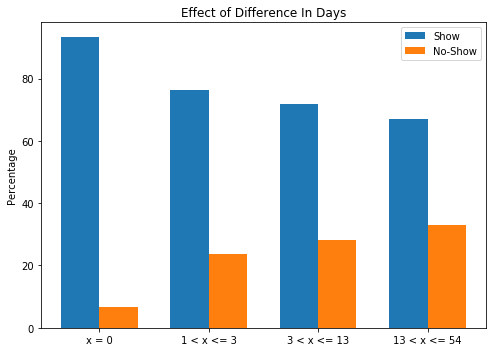

In [420]:
labels = ['x = 0', '1 < x <= 3', '3 < x <= 13', '13 < x <= 54']
x = np.arange(len(labels))

Age_show = [Equal_0_Show, Less_3_Show, Less_13_Show, Less_54_Show]
Age_no =[Equal_0_No_Show, Less_3_No_Show, Less_13_No_Show, Less_54_No_Show]
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Age_show, width, label='Show')
rects2 = ax.bar(x + width/2, Age_no, width, label='No-Show')

ax.set_ylabel('Percentage')
ax.set_title('Effect of Difference In Days')
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.legend()
plt.xticks = labels
figure = plt.gcf()
figure.set_size_inches(7,5)
fig.tight_layout()

### 6. Does Alcolholism Affect Showing up For Appointments

In [421]:
Alcoholist_Show = df_show['Alcoholism'].value_counts()[1]/np.count_nonzero(df['Alcoholism']==1)*100
Not_Alcoholis_Show = df_show['Alcoholism'].value_counts()[0]/np.count_nonzero(df['Alcoholism']==0)*100
print(Alcoholist_Show, Not_Alcoholis_Show)
print(df_show['Alcoholism'].value_counts()[1])

79.8860911271 80.0403765931
2665


In [422]:
Alcoholist_No_Show = df_no['Alcoholism'].value_counts()[1]/np.count_nonzero(df['Alcoholism']==1)*100
Not_Alcoholist_No_Show = df_no['Alcoholism'].value_counts()[0]/np.count_nonzero(df['Alcoholism']==0)*100
print(Alcoholist_No_Show, Not_Alcoholist_No_Show)


20.1139088729 19.9596234069


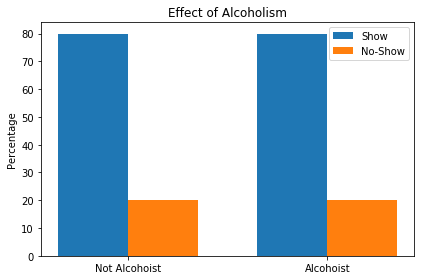

In [423]:
labels = ["Not Alcohoist","Alcohoist"]
x = np.arange(len(labels))

Alcohol_show = [Not_Alcoholis_Show, Alcoholist_Show]
Alcohol_no =[Not_Alcoholist_No_Show, Alcoholist_No_Show]
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Alcohol_show, width, label='Show')
rects2 = ax.bar(x + width/2, Alcohol_no, width, label='No-Show')

ax.set_ylabel('Percentage')
ax.set_title('Effect of Alcoholism')
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.legend()
plt.xticks = labels
fig.tight_layout()

### 7. Does Receiving an SMS Affect Showing up For Appointments

In [424]:
Received_SMS_Show = df_show['SMS_received'].value_counts()[1]/np.count_nonzero(df['SMS_received']==1)*100
No_Received_Show = df_show['SMS_received'].value_counts()[0]/np.count_nonzero(df['SMS_received']==0)*100
print(Received_SMS_Show, No_Received_Show)
print(df_show['SMS_received'].value_counts()[1])


72.3711095976 83.5292847212
24439


In [425]:
Received_SMS_No_Show = df_no['SMS_received'].value_counts()[1]/np.count_nonzero(df['SMS_received']==1)*100
No_Received_No_Show = df_no['SMS_received'].value_counts()[0]/np.count_nonzero(df['SMS_received']==0)*100
print(Received_SMS_No_Show, No_Received_No_Show)


27.6288904024 16.4707152788


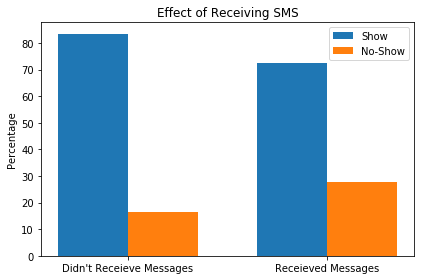

In [426]:
labels = ["Didn't Receieve Messages","Receieved Messages"]
x = np.arange(len(labels))

SMS_show = [No_Received_Show, Received_SMS_Show]
SMS_no =[No_Received_No_Show, Received_SMS_No_Show]
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, SMS_show, width, label='Show')
rects2 = ax.bar(x + width/2, SMS_no, width, label='No-Show')

ax.set_ylabel('Percentage')
ax.set_title('Effect of Receiving SMS')
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.legend()
plt.xticks = labels
fig.tight_layout()

### Need To Send More SMS To Patients
### The Majority of Those Who Showed Up Received No Messages At All

### 8. Does Having a Handicap Affect Showing Up For Appointments

In [343]:
Handicapped_Show = df_show['Handicap'].value_counts()[1]/np.count_nonzero(df['Handicap']==1)*100
Non_Handicapped_Show = df_show['Handicap'].value_counts()[0]/np.count_nonzero(df['Handicap']==0)*100
print(Handicapped_Show, Non_Handicapped_Show)
print(df_show['Handicap'].value_counts()[1])


82.2506861848 79.9897791153
1798


In [344]:
Handicapped_No_Show = df_no['Handicap'].value_counts()[1]/np.count_nonzero(df['Handicap']==1)*100
Non_Handicapped_No_Show = df_no['Handicap'].value_counts()[0]/np.count_nonzero(df['Handicap']==0)*100
print(Handicapped_No_Show, Non_Handicapped_No_Show)


17.7493138152 20.0102208847


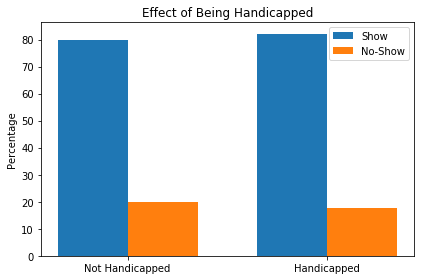

In [345]:
#(df_show['Handicap'].value_counts()/total_show).plot(kind='bar',width =0.2 ,alpha=0.5, color= 'green', label='show', position = 0)
#(df_no['Handicap'].value_counts()/total_noShow).plot(kind='bar',width = 0.2 ,alpha=0.5, color= 'red', label='no_show', position = 1)
#plt.grid(True)
#plt.legend()
labels = ['Not Handicapped','Handicapped']
x = np.arange(len(labels))

Handicapped_show = [Non_Handicapped_Show, Handicapped_Show]
Handicapped_no =[Non_Handicapped_No_Show, Handicapped_No_Show]
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Handicapped_show, width, label='Show')
rects2 = ax.bar(x + width/2, Handicapped_no, width, label='No-Show')

ax.set_ylabel('Percentage')
ax.set_title('Effect of Being Handicapped')
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.legend()
plt.xticks = labels
fig.tight_layout()

### 9. Effect of Age and Alcholism on Showing up For Appointments

0.231892944741
0.269299820467


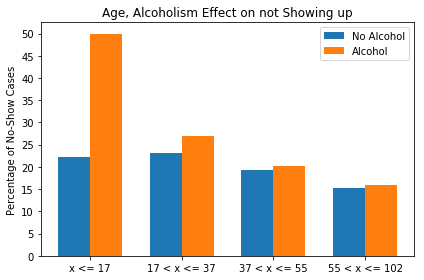

In [471]:
labels = ['x <= 17', '17 < x <= 37', '37 < x <= 55', '55 < x <= 102']
x = np.arange(len(labels))

No_Alcohol = df.groupby(['Age_Intervals', 'Alcoholism'])['No_show'].mean()[::2]*100
Alcohol  = df.groupby(['Age_Intervals', 'Alcoholism'])['No_show'].mean()[1::2]*100
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, No_Alcohol, width, label='No Alcohol')
rects2 = ax.bar(x + width/2, Alcohol, width, label='Alcohol')

ax.set_ylabel('Percentage of No-Show Cases')
ax.set_title('Age, Alcoholism Effect on not Showing up')
ax.set_xticklabels(labels)
ax.set_xticks(x)
ax.legend()
ax.set_yticks(np.arange(0, 55, 5))
plt.xticks = labels
fig.tight_layout()
print(df.groupby(['Age_Intervals', 'Alcoholism'])['No_show'].mean()[2])
print(df.groupby(['Age_Intervals', 'Alcoholism'])['No_show'].mean()[3])

<a id='conclusions'></a>
## Conclusions

> The Questions study the effect of different variables on whether a person will show up for appointments.

> 1. Gender: No Singificant Results Based on Gender: 80.3% of Females showed up while 79.9% of Males showed up

> 2. Age: Results showed that 77.8% of new-borns to 17 years of age show up for appointments, while that percentage decreased to 76.7% among 18 year-olds to 37 year-olds, then increased to around 80.6% for those between 37 and 54 years of age, then further increased to 84.7% for those between 55 and 102 years of age.
    This shows that those in 20s and 30s show up less for appointments, probably because of some busy lifestyles, while senior citizens are the group with the highest likelihood of showing up.
    
> 3. Hipertension: Results showed that those suffering from hipertension are more likely to show up for appointments with 83% versus 79% for those who suffer no hipertension

> 4. Diabetes: Results showed that those suffering from Diabetes are more likely to show up for appointments with 82.3% versus 79.9% for those who suffer no Diabetes

> 5. Days Difference (between scheduled day and actual appointment day):
Results showed that 93.4% of those who have their actual appointment day on same day as scheduled, show up for appointments, while 76.4% of those who have up to 3 days difference show up, this further decreases to be 71.8% for those who have up to 17 days difference, to finally reach 66.9% for those who have up to 54 days.

> 6. Alcoholism:  Results showed that Alcoholist are more likely to not show up for appointments with 79.9% versus 80.5% for non-Alocholists, but results aren't significant with this factor only.

> 7. SMS: Results showed that those who recieve one or more SMS are more likely to not show up for appointments with 72.4% versus 73.5% for those who received no SMS

> 8. Handicap: Results showed that those suffering from a  Handicap are more likely to show up for appointments with 82.3% versus 80% for those who suffer no Handicap

> 9. Age, Alcoholism Effect on No-Show: By comparing Alcoholism for different groups of people based on age, we can see a higher significance for use of Alcohol on each age group. 50% of Alcolhol users below 17 years old don't show up for appointments, versus only 23% on non Alcoholists of same group.
This Difference decreases gradually as age group gets older, for whom using alcohol is more normalized, so its significance on character decreases, for instance it is 26% versus 23% in the next age group and even further decreases later.
We can say that Alcoholism is a major factor for young persons.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [473]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0